# DSP - Aufgabenblatt 5
#### FHNW HS2021

## *NumPy*

Schreiben Sie, wo immer möglich und sinnvoll, für die Umsetzung der Aufgabenstellungen Funktionen. Führen Sie die Funktionen mittels `%timeit` aus. Versuchen Sie eine effiziente Implementierung zu finden.

### Aufgabe 1

Berechnen Sie von hundert 2-dimensional gleichverteilten Punkten $x = (x_1, x_2)$ aus dem Bereich $x_1 \in [-4, 4]$ und $x_2 \in [-4, 4]$ deren Koordinaten in Polarkoordinaten. Setzen Sie sämtliche Längen $r$ auf $1$. Berechnen Sie nun die Zwischenwinkel zwischen zwei auf dem Einheitskreis benachbarten Punkten.  

Wie verhält sich der Mittelwert der Zwischenwinkel wenn sie die Anzahl Punkte verändern?  

Was ist der Unterschied zum Szenario, wenn Sie mit Punkten gleichverteilt auf dem Einheitskreis beginnen?

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
plt.style.use('seaborn-muted')

In [2]:
NPOINTS = 10000

In [3]:
X = np.random.uniform(-4, 4, size=(NPOINTS, 2))

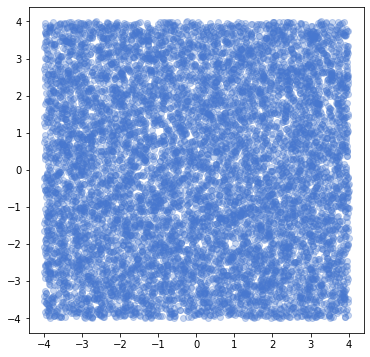

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], alpha=0.3)

In [5]:
r = np.linalg.norm(X, axis=1)

In [6]:
# ignore division by 0 warnings
with np.errstate(divide='ignore'):
    alpha = np.arctan(X[:,1]/X[:,0])

In [7]:
alpha[np.logical_and(X[:,0] < 0, X[:,1] > 0)] += np.pi
alpha[np.logical_and(X[:,0] < 0, X[:,1] <= 0)] += np.pi
alpha[np.logical_and(X[:,0] >= 0, X[:,1] < 0)] += 2*np.pi

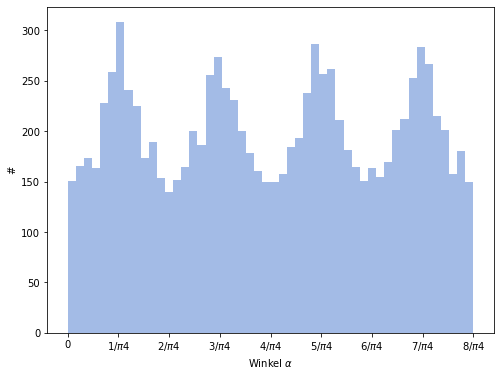

In [8]:
NBINS = 50
fig, ax = plt.subplots(figsize=(8,6))
_, bins, _ = ax.hist(alpha, bins=np.linspace(0, 2*np.pi, NBINS+1), alpha=0.5)
ax.set_xticks(np.linspace(0, 2*np.pi, 9))
_ = ax.set_xticklabels([0]+[r'${}/\pi4$'.format(i) for i in range(1,9) ])
_ = ax.set_xlabel(r'Winkel $\alpha$')
_ = ax.set_ylabel('#')

In [9]:
# sort the alphas so that we can take the diff thereafter
alpha.sort()
# calculate mean of angles in between
np.diff(alpha).mean()

0.0006282718303227663

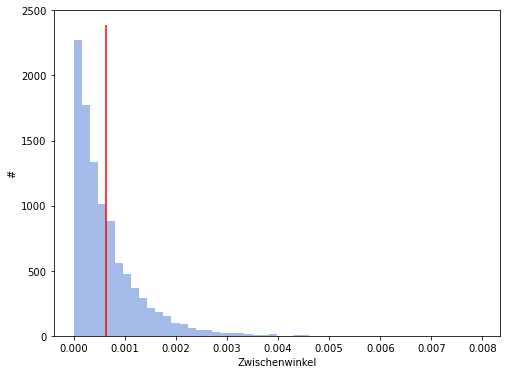

In [10]:
NBINS = 50
fig, ax = plt.subplots(figsize=(8,6))
_, bins, _ = ax.hist(np.diff(alpha), bins=NBINS, alpha=0.5)
_ = ax.vlines(np.diff(alpha).mean(), 0, ax.get_ylim()[1], 'r')
_ = ax.set_xlabel('Zwischenwinkel')
_ = ax.set_ylabel('#')

### Uniform auf dem Einheitskreis

In [11]:
alphas = np.random.uniform(0, 2*np.pi, NPOINTS)

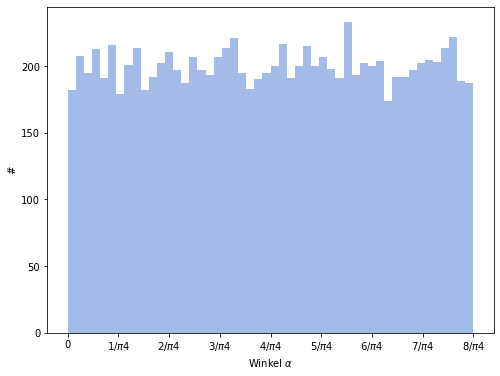

In [12]:
NBINS = 50
fig, ax = plt.subplots(figsize=(8,6))
_, bins, _ = ax.hist(alphas, bins=np.linspace(0, 2*np.pi, NBINS+1), alpha=0.5)
ax.set_xticks(np.linspace(0, 2*np.pi, 9))
_ = ax.set_xticklabels([0]+[r'${}/\pi4$'.format(i) for i in range(1,9) ])
_ = ax.set_xlabel(r'Winkel $\alpha$')
_ = ax.set_ylabel('#')

In [13]:
alphas.sort()
# calculate mean of angles in between
np.diff(alphas).mean()

0.0006282693175362355

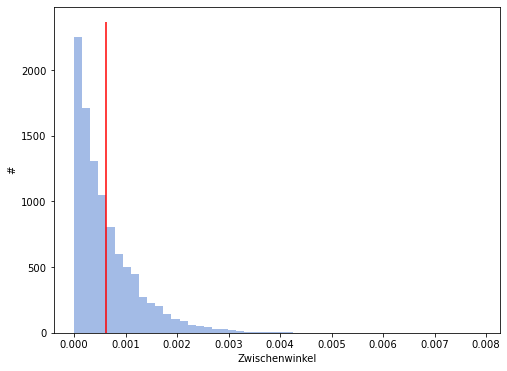

In [14]:
NBINS = 50
fig, ax = plt.subplots(figsize=(8,6))
_, bins, _ = ax.hist(np.diff(alphas), bins=NBINS, alpha=0.5)
_ = ax.vlines(np.diff(alphas).mean(), 0, ax.get_ylim()[1], 'r')
_ = ax.set_xlabel('Zwischenwinkel')
_ = ax.set_ylabel('#')

### Aufgabe 2

Finden Sie für den folgenden Code, welcher für einen Datensatz sämtliche Variabeln auf das Intervall 0 und 1 limitiert, eine effiziente, vektorisierte Schreibweise.

In [15]:
def minmax_scaling(X):
    ''' Scaling each feature to the range [0,1].
    '''
    min_, max_ = [], []
    for x in X:
        for idx, xi in enumerate(x):
            if not len(min_) == len(x):
                min_.append(xi)
            if not len(max_) == len(x):
                max_.append(xi)
            if xi < min_[idx]:
                min_[idx] = xi
            if xi > max_[idx]:
                max_[idx] = xi
    
    MM = []
    for x in X:
        mm = []
        for idx, xi in enumerate(x):
            mm.append((x[idx] - min_[idx])/(max_[idx] - min_[idx]))
        MM.append(mm)

    return np.array(MM)

In [16]:
X = np.random.randint(10, size=(100000,10))

In [17]:
%timeit minmax_scaling(X)

3.43 s ± 607 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
def minmax_scaling_vec(X):
    ''' Scaling each feature to the range [0,1].
    '''
    min_ = X.min(axis=0)
    return (X-min_)/(X.max(axis=0)-min_)

In [19]:
np.array_equal(minmax_scaling_vec(X), minmax_scaling(X))

True

In [20]:
%timeit minmax_scaling_vec(X)

18.4 ms ± 775 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
# x times faster
1.2/0.018

66.66666666666667

### Aufgabe 3

Implementieren Sie [*k-Nearest-Neighbour*-Klassifikation](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).  

Untersuchen Sie das Ergebnis am Iris-Datensatz.

In [22]:
import pandas as pd

import seaborn as sns

sns.set_style('whitegrid')

In [23]:
df = pd.read_csv('/data/iris_data.csv')

In [24]:
df.head()

,sepal length,sepal width,petal length,petal width,name
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
df.name.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

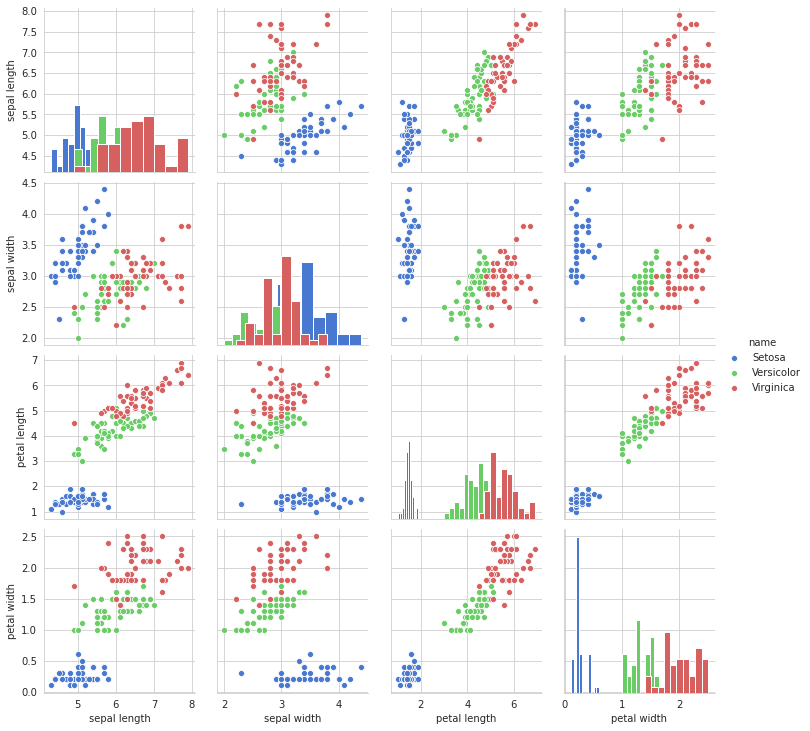

In [26]:
sns.pairplot(df, hue='name', diag_kind='hist')

In [27]:
def kNN(point, X, y, k=5):
    '''Returns the kNN-estimate for point, given (X,y).
    '''
    from collections import Counter
    # calculate all distances for point to X
    dst = np.linalg.norm(X - point, axis=1)
    # find k closest neighbours
    knn = np.argsort(dst)[:k]
    # count votes
    c = Counter(y[knn])
    return knn, c.most_common()[0][0]

#### Verify Results by Example

In [28]:
knn, yhat = kNN(np.array([5.1, 3.5, 1.4, 0.2]), df[df.columns[:-1]].values, df['name'].values)
yhat

'Setosa'

In [29]:
knn, yhat = kNN(np.array([6.1, 2.5, 4.0, 1.5]), df[df.columns[:-1]].values, df['name'].values)
yhat

'Versicolor'

In [30]:
knn, yhat = kNN(np.array([6.1, 2.5, 5.0, 1.5]), df[df.columns[:-1]].values, df['name'].values)
yhat

'Virginica'

In [31]:
knn, yhat = kNN(np.array([6.1, 2.5, 5.0, 1.7]), df[df.columns[:-1]].values, df['name'].values)

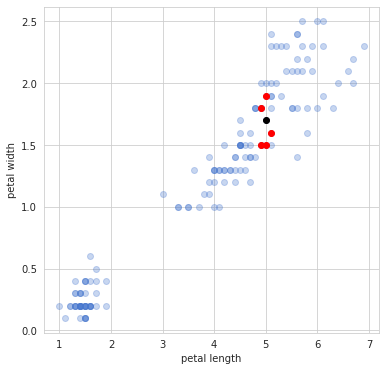

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
_ = ax.scatter(df['petal length'].values, df['petal width'].values, alpha=0.3)
_ = ax.scatter([5.0], [1.7,], c='black')
_ = ax.scatter(df['petal length'].values[knn], df['petal width'].values[knn], c='red')
_ = ax.set_xlabel('petal length')
_ = ax.set_ylabel('petal width')

#### Achtung: 4-dimensionaler kNN !

### Aufgabe 4

Erzeugen Sie einen Datensatz $(y, X)$ von $n=1000$ Datenpunktpaaren, wobei $y = X\beta + \epsilon$, d.h. einer linearen Beziehung unterliegen. $\epsilon$ sei zufälliges Rauschen, welches sie mit `np.random.randn` erzeugen können.  

Setzen Sie dann die Normalengleichung wie im Skript eingführt um, um die Koeffizienten $\beta$ zu berechnen.  

Wie genau fällt Ihre Schätzung aus? 

In [33]:
N = 1000
a, b = 2, -3
mux, sigmax = 2, 6 
sigmaepsilon = 2.5

x = np.random.randn(N)*sigmax + mux
y = a*x + b + np.random.randn(N)*sigmaepsilon

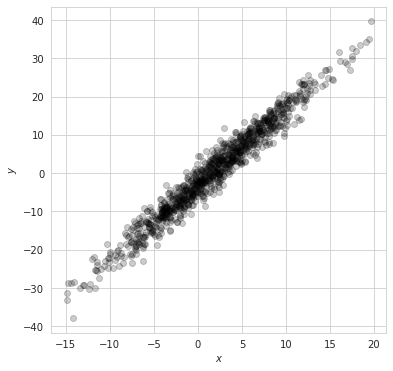

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
_ = ax.scatter(x,y, c='k', alpha=0.2)
_ = ax.set_xlabel(r'$x$')
_ = ax.set_ylabel(r'$y$')

In [35]:
X = np.vstack((np.ones(N), x)).T

In [36]:
# normal equation
betahat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [37]:
betahat

array([-2.86981432,  1.96975283])

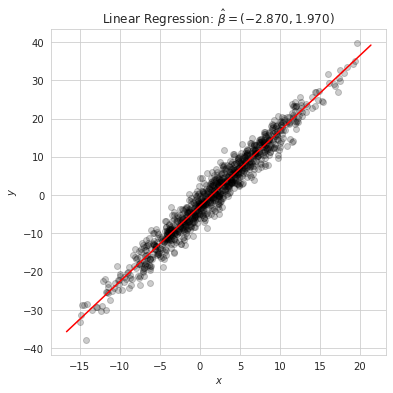

In [38]:
fig, ax = plt.subplots(figsize=(6,6))
_ = ax.scatter(x,y, c='k', alpha=0.2)
_ = ax.set_xlabel(r'$x$')
_ = ax.set_ylabel(r'$y$')
xlim = ax.get_xlim()
_ = ax.plot([xlim[0],xlim[1]],[xlim[0]*betahat[1]+betahat[0], xlim[1]*betahat[1]+betahat[0]], c='red', label='linear regression')
_ = ax.set_title(r'Linear Regression: $\hat \beta = ({:.3f},{:.3f})$'.format(betahat[0], betahat[1]))